# Usage (datasets)
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.13.2'

## Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "input" directory and load them.

In [5]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu()
# Linelist of case reports
linelist = data_loader.linelist()
# Population in each country
population_data = data_loader.population()
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()
# The number of tests
pcr_data = data_loader.pcr()

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Please set verbose=2 to see the detailed citation list.




Retrieving linelist from Open COVID-19 Data Working Group repository: https://github.com/beoutbreakprepared/nCoV2019


Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [6]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [7]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [8]:
# Detailed citation list of COVID-19 Data Hub
# print(data_loader.covid19dh_citation)

In [9]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
364644,2020-12-14,4865,1072.0,1040,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
364645,2020-12-15,4865,1072.0,1041,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
364646,2020-12-16,4865,1093.0,1046,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
364647,2020-12-17,4865,1093.0,1066,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
364648,2020-12-18,4865,1093.0,1066,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19


In [10]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
13505,2020-12-13,Japan,-,177287,25439,2562,149286
13506,2020-12-14,Japan,-,179653,26121,2585,150947
13507,2020-12-15,Japan,-,181870,25708,2643,153519
13508,2020-12-16,Japan,-,184042,25807,2688,155547
13509,2020-12-17,Japan,-,187103,26077,2739,158287


In [11]:
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361215 entries, 0 to 13509
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       361215 non-null  datetime64[ns]
 1   Country    361215 non-null  category      
 2   Province   361215 non-null  category      
 3   Confirmed  361215 non-null  int64         
 4   Infected   361215 non-null  int64         
 5   Fatal      361215 non-null  int64         
 6   Recovered  361215 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 18.0 MB


Total number of cases in all countries with `JHUData.total()` method.

In [12]:
# Calculate total values
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-12-14,72940444,23818006,1624999,47497439,0.022278,0.651181,0.033081
2020-12-15,73550109,24076690,1637858,47835561,0.022269,0.650381,0.033106
2020-12-16,74272004,24452354,1650404,48169246,0.022221,0.648552,0.033128
2020-12-17,74968404,24793999,1661927,48512478,0.022168,0.647106,0.033123
2020-12-18,74781317,24767922,1659188,48354207,0.022187,0.646608,0.033175


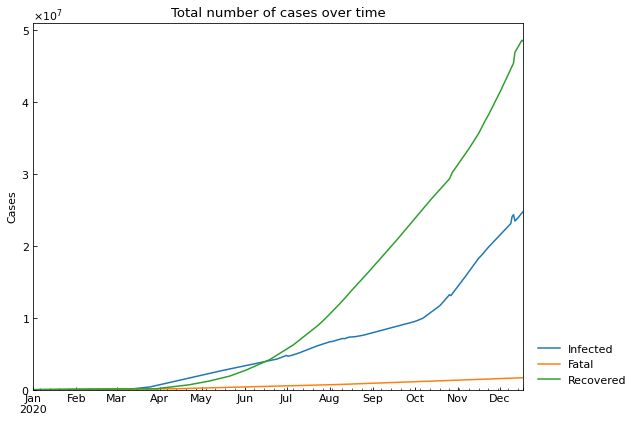

In [13]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [14]:
# Statistics of rate values in all countries
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,352.0,0.038932,0.017374,0.000000,0.025788,0.034274,0.049910,0.074283
Recovered per Confirmed,352.0,0.424270,0.252732,0.001291,0.200000,0.500578,0.647223,1.000000
Fatal per (Fatal or Recovered),352.0,0.208016,0.272421,0.000000,0.041214,0.080637,0.223757,0.943005


We can create a subset for a country using `JHUData.subset()` method.

In [15]:
# Subset for a country
df, _ = jhu_data.records("Japan")
df.tail()
# We can use ISO3 code etc.
# df, _ = jhu_data.records("JPN")
# df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
311,2020-12-13,177287,25439,2562,149286
312,2020-12-14,179653,26121,2585,150947
313,2020-12-15,181870,25708,2643,153519
314,2020-12-16,184042,25807,2688,155547
315,2020-12-17,187103,26077,2739,158287


Province ("prefecture" for Japan) name can be specified.

In [16]:
df, _ = jhu_data.records("Japan", province="Tokyo")
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
257,2020-12-12,46745,5760,535,40450
258,2020-12-13,47225,5873,535,40817
259,2020-12-14,47530,5680,538,41312
260,2020-12-15,47990,5600,547,41843
261,2020-12-16,48668,5827,557,42284


In [17]:
# Countries we can select
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Atlantica', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Grand Princess',
 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

### Linelist of case reports
The number of cases is important, but linelist of case reports will helpful to understand the situation deeply. Linelist data was saved as `linelist`, an instance of `LinelistData` class. This dataset is from [Open COVID-19 Data Working Group](https://github.com/beoutbreakprepared/nCoV2019).

In [18]:
type(linelist)

covsirphy.cleaning.linelist.LinelistData

In [19]:
# Citation
print(linelist.citation)

Xu, B., Gutierrez, B., Mekaru, S. et al. Epidemiological data from the COVID-19 outbreak, real-time case information. Sci Data 7, 106 (2020). https://doi.org/10.1038/s41597-020-0448-0


In [20]:
# Raw dataset
linelist.raw.tail()

,age,sex,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,chronic_disease,outcome,date_death_or_discharge
2676307,52,female,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676308,52,female,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676309,52,male,Callao,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676310,52,male,Lima,Peru,NaN,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Cleaned dataset
linelist.cleaned().tail()

,Country,Province,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
2676306,Peru,Coronel Portillo,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676307,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676308,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676309,Peru,Callao,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male
2676310,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male


In [22]:
# Subset for specified area
linelist.subset("Japan", province="Tokyo").tail()

,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
107,NaT,2020-01-30,NaT,True,False,False,False,NaN,NaN,NaN,female
108,NaT,2020-01-24,NaT,True,False,True,False,fever:pneumonia:sore throat,NaN,40.0,male
109,2020-10-01,2020-01-15,2020-01-15,True,False,True,False,cough:fever:sore throat,NaN,30.0,male
110,NaT,2020-01-25,NaT,True,False,False,False,cough:fever,NaN,NaN,female
111,NaT,2020-01-26,NaT,True,False,False,False,fever:joint pain:pneumonia,NaN,40.0,male


In [23]:
# Subset for outcome ("Recovered" or "Fatal")
linelist.closed(outcome="Recovered").tail()

,Country,Province,Hospitalized_date,Confirmation_date,Recovered_date,Symptoms,Chronic_disease,Age,Sex
272,Singapore,-,2020-02-02,2020-02-06,2020-02-17,NaN,NaN,39.0,female
273,Malaysia,Johor,NaT,2020-01-25,2020-02-08,cough:fever,NaN,40.0,male
274,China,Gansu,2020-07-02,2020-02-08,2020-02-17,diarrhea,NaN,1.0,female
275,Canada,Ontario,NaT,2020-01-25,2020-01-31,NaN,hypertension,NaN,male
276,Canada,Ontario,NaT,2020-01-31,2020-02-19,NaN,NaN,NaN,female


As the median value of the period from confirmation to recovery, we can calculate recovery period.

In [24]:
# Recovery period (integer) [days]
linelist.recovery_period()

12

### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models. This dataset was saved as `population_data`, an instance of `PopulationData` class.

In [25]:
type(population_data)

covsirphy.cleaning.population.PopulationData

In [26]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [27]:
# Raw data (the same as jhu_data)
# population_data.raw.tail()

In [28]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
307458,COL,Colombia,Vichada,2020-12-14,107808
307459,COL,Colombia,Vichada,2020-12-15,107808
307460,COL,Colombia,Vichada,2020-12-16,107808
307461,COL,Colombia,Vichada,2020-12-17,107808
307462,COL,Colombia,Vichada,2020-12-18,107808


We will get the population values with `PopulationData.value()`.

In [29]:
# In a country
population_data.value("Japan", province=None)
# In a country with ISO3 code
# population_data.value("JPN", province=None)
# In a province (prefecture)
# population_data.value("Japan", province="Tokyo")

126529100

We can update the population values.

In [30]:
# Before
population_before = population_data.value("Japan", province="Tokyo")
print(f"Before: {population_before}")
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_after = population_data.value("Japan", province="Tokyo")
print(f" After: {population_after}")

Before: 13942856
 After: 14002973


### Government Response Tracker (OxCGRT)
Government responses are tracked with [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker). Because government responses and activities of persons change the parameter values of SIR-derived models, this dataset is significant when we try to forcast the number of cases.  
With `DataLoader` class, the dataset was retrieved via [COVID-19 Data Hub](https://covid19datahub.io/) and saved as `oxcgrt_data`, an instance of `OxCGRTData` class.

In [31]:
type(oxcgrt_data)

covsirphy.cleaning.oxcgrt.OxCGRTData

In [32]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [33]:
# Raw data (the same as jhu_data)
# oxcgrt_data.raw.tail()

In [34]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
364644,2020-12-14,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
364645,2020-12-15,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
364646,2020-12-16,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
364647,2020-12-17,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
364648,2020-12-18,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19


In [35]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()
# We can use ISO3 codes
# oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
348,2020-12-14,1,1,1,0,1,1,1,3,2,3,2,53.7
349,2020-12-15,1,1,1,0,1,1,1,3,2,3,2,53.7
350,2020-12-16,1,1,1,0,1,1,1,3,2,3,2,53.7
351,2020-12-17,1,1,1,0,1,1,1,3,2,3,2,53.7
352,2020-12-18,1,1,1,0,1,1,1,3,2,3,2,53.7


### The number of tests
The number of tests is also key information to understand the situation.
This dataset was saved as `pcr_data`, an instance of `PCRData` class.

In [36]:
type(pcr_data)

covsirphy.cleaning.pcr_data.PCRData

In [37]:
# Description/citation
print(pcr_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [38]:
# Raw data (the same as jhu_data)
# pcr_data.raw.tail()

In [39]:
# Cleaned data
pcr_data.cleaned().tail()

,Date,Country,Province,Tests,Confirmed
13505,2020-12-13,Japan,-,4032816,177287
13506,2020-12-14,Japan,-,4048710,179653
13507,2020-12-15,Japan,-,4105648,181870
13508,2020-12-16,Japan,-,4152589,184042
13509,2020-12-17,Japan,-,4209796,187103


In [40]:
# Subset for a country
pcr_data.subset("Japan").tail()
# We can use ISO3 codes
# pcr_data.subset("JPN").tail()

,Date,Tests,Confirmed
311,2020-12-13,4032816,177287
312,2020-12-14,4048710,179653
313,2020-12-15,4105648,181870
314,2020-12-16,4152589,184042
315,2020-12-17,4209796,187103


Under the assumption that all tests were PCR test, we can calculate the positive rate of PCR tests aas "the number of confirmed cases per the number of tests".

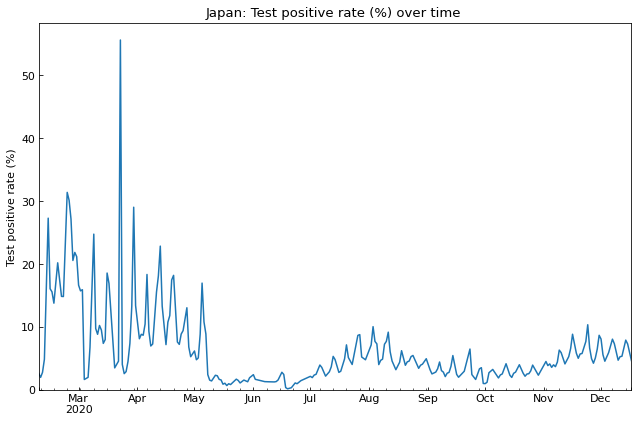

In [41]:
# Positive rate in Japan
_ = pcr_data.positive_rate("Japan")